In [6]:
pip install nltk

                                              0.0/1.5 MB ? eta -:--:--
     ----                                     0.2/1.5 MB 3.1 MB/s eta 0:00:01
     ----------                               0.4/1.5 MB 4.0 MB/s eta 0:00:01
     --------------                           0.5/1.5 MB 3.7 MB/s eta 0:00:01
     -----------------                        0.6/1.5 MB 3.7 MB/s eta 0:00:01
     --------------------                     0.8/1.5 MB 3.2 MB/s eta 0:00:01
     -------------------------                1.0/1.5 MB 3.4 MB/s eta 0:00:01
     ------------------------------           1.1/1.5 MB 3.4 MB/s eta 0:00:01
     ----------------------------------       1.3/1.5 MB 3.4 MB/s eta 0:00:01
     ------------------------------------     1.4/1.5 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
                                              0.0/269.5 kB ? eta -:--:-

In [9]:
pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     -----------                             92.2/300.2 kB 1.7 MB/s eta 0:00:01
     ----------------------                 174.1/300.2 kB 2.1 MB/s eta 0:00:01
     -------------------------------------  297.0/300.2 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv')
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [4]:
data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [7]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


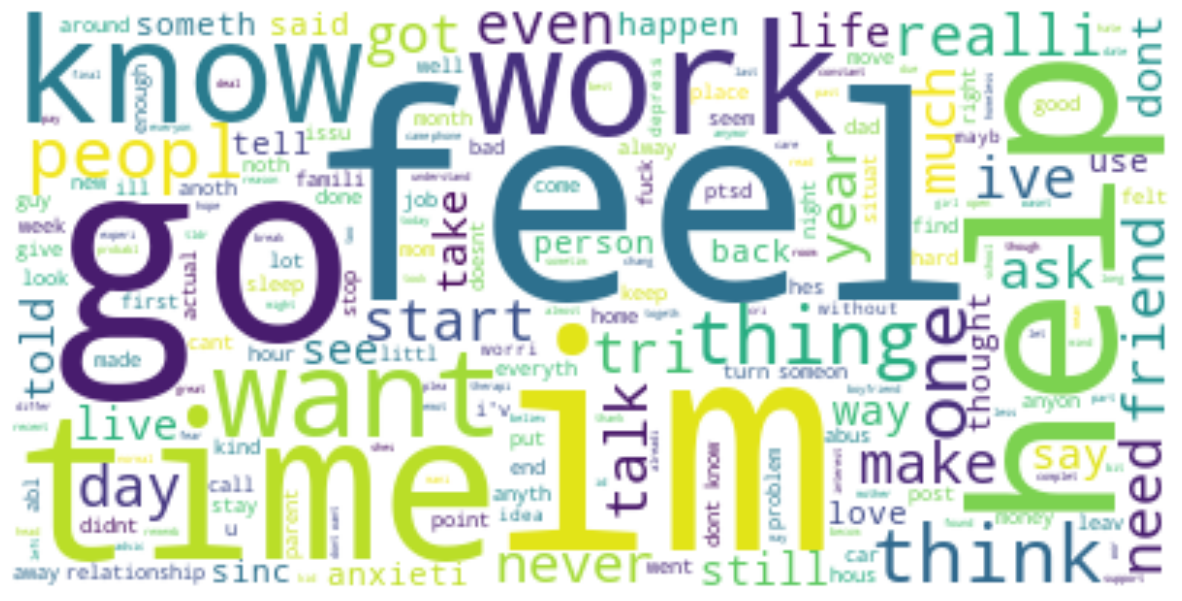

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
data['label'] = data['label'].map({0: 'No Stress', 1: 'Stress'})
data = data[['text', 'label']]
data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

In [13]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [18]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text:  I am having an anxiety attack


['No Stress']
